<a href="https://colab.research.google.com/github/sheamusfitz/DSPS_jFitzgerald/blob/master/HW6/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*note to self, here's the link*

https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW6/SNdataLineFit.ipynb

# Header, Initialization, etc.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Making directories as needed, getting data

In [4]:
cd /content/drive/My\ Drive/dsps

/content/drive/My Drive/dsps


In [5]:
pwd

'/content/drive/My Drive/dsps'

In [6]:
ls

dsps2019/  hw6/        pluto_18v2_1.csv   PlutoReadme18v2.1.pdf
HW5.ipynb  lab6.ipynb  PLUTODD18v2.1.pdf  Untitled0.ipynb


In [7]:
mkdir hw6

mkdir: cannot create directory ‘hw6’: File exists


In [8]:
cd hw6

/content/drive/My Drive/dsps/hw6


In [9]:
!wget 'http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz' -nc

File ‘jla_likelihood_v6.tgz’ already there; not retrieving.



In [10]:
ls

jla_likelihood_v6/  jla_likelihood_v6.tgz


In [0]:
!tar -xf jla_likelihood_v6.tgz

# Looking at the data

From the ReadMe included with the data:
```
  | zcmb: CMB frame redshift (including peculiar velocity corrections for
  |       nearby supernova based on the models of M.J. Hudson)
  | ...
  | mb: B band peak magnitude
  | dmb: Error in mb (includes contributions from intrinsic dispersion, 
  |      lensing, and redshift uncertainty)
```

From here on, **MB** will represent B-band peak magnitude, and **zCMB** will represent the redshift of the supernovae adjusted to the value as measured in the Cosmic Microwave Background frame.

In [12]:
ls

jla_likelihood_v6/  jla_likelihood_v6.tgz


In [13]:
ls jl*/data

jla.dataset            JLA.paramnames         jla_v0_covmatrix.dat
jla_lcparams.txt       jla_simple.dataset     jla_vab_covmatrix.dat
jla_mub_covmatrix.dat  jla_simple.dataset~    jla_va_covmatrix.dat
jla_mub.txt            jla_v0a_covmatrix.dat  jla_vb_covmatrix.dat
jla_mub.txt~           jla_v0b_covmatrix.dat


In [14]:
!head jl*/data/jla_lcparams.txt
!pwd

#name zcmb zhel dz mb dmb x1 dx1 color dcolor 3rdvar d3rdvar tmax dtmax cov_m_s cov_m_c cov_s_c set ra dec biascor
03D1au 0.503084 0.504300 0 23.001698 0.088031 1.273191 0.150058 -0.012353 0.030011 9.517000 0.110500 52909.745220 0.214332 0.000790 0.000440 -0.000030 1 36.043210 -4.037469 0.001697
03D1aw 0.580724 0.582000 0 23.573937 0.090132 0.974346 0.273823 -0.025076 0.036691 9.169000 0.088000 52902.898002 0.352732 0.002823 0.000415 0.001574 1 36.061634 -4.517158 0.000843
03D1ax 0.494795 0.496000 0 22.960139 0.088110 -0.728837 0.102069 -0.099683 0.030305 11.580000 0.112500 52915.923670 0.111634 0.000542 0.000475 -0.000024 1 36.097287 -4.720774 0.001692
03D1bp 0.345928 0.347000 0 22.398137 0.087263 -1.155110 0.112834 -0.040581 0.026679 10.821000 0.123500 52920.249015 0.102828 0.001114 0.000616 0.000295 1 36.657235 -4.838779 -0.000270
03D1co 0.677662 0.679000 0 24.078115 0.098356 0.618820 0.404295 -0.039380 0.067403 8.647000 0.284000 52954.458342 0.454715 0.011857 0.000780 0.005898 1 36

In [0]:
jla = pd.read_csv("/content/drive/My Drive/dsps/hw6/jla_likelihood_v6/data/jla_lcparams.txt", sep=" ")

In [16]:
print(jla.head(),'\n',jla.shape)

    #name      zcmb    zhel  dz  ...  set         ra       dec   biascor
0  03D1au  0.503084  0.5043   0  ...    1  36.043210 -4.037469  0.001697
1  03D1aw  0.580724  0.5820   0  ...    1  36.061634 -4.517158  0.000843
2  03D1ax  0.494795  0.4960   0  ...    1  36.097287 -4.720774  0.001692
3  03D1bp  0.345928  0.3470   0  ...    1  36.657235 -4.838779 -0.000270
4  03D1co  0.677662  0.6790   0  ...    1  36.567748 -4.935050 -0.002855

[5 rows x 21 columns] 
 (740, 21)


In [17]:
jla.describe()

zcmb        zhel     dz  ...          ra         dec     biascor
count  740.000000  740.000000  740.0  ...  740.000000  740.000000  740.000000
mean     0.323804    0.324449    0.0  ...   93.551713    5.726200   -0.004195
std      0.276869    0.276748    0.0  ...  119.504602   22.728815    0.006796
min      0.010060    0.009370    0.0  ...  -55.207462  -66.485085   -0.036389
25%      0.124240    0.124418    0.0  ...    4.812357   -1.037904   -0.008439
50%      0.229045    0.230515    0.0  ...   36.667567    0.237261   -0.001083
75%      0.498216    0.499000    0.0  ...  190.881058    2.146795   -0.000380
max      1.299106    1.300000    0.0  ...  359.635090   79.031740    0.002649

[8 rows x 20 columns]

In [18]:
jla.columns

Index(['#name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
       'dcolor', '3rdvar', 'd3rdvar', 'tmax', 'dtmax', 'cov_m_s', 'cov_m_c',
       'cov_s_c', 'set', 'ra', 'dec', 'biascor'],
      dtype='object')

# Scatter Matrix

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


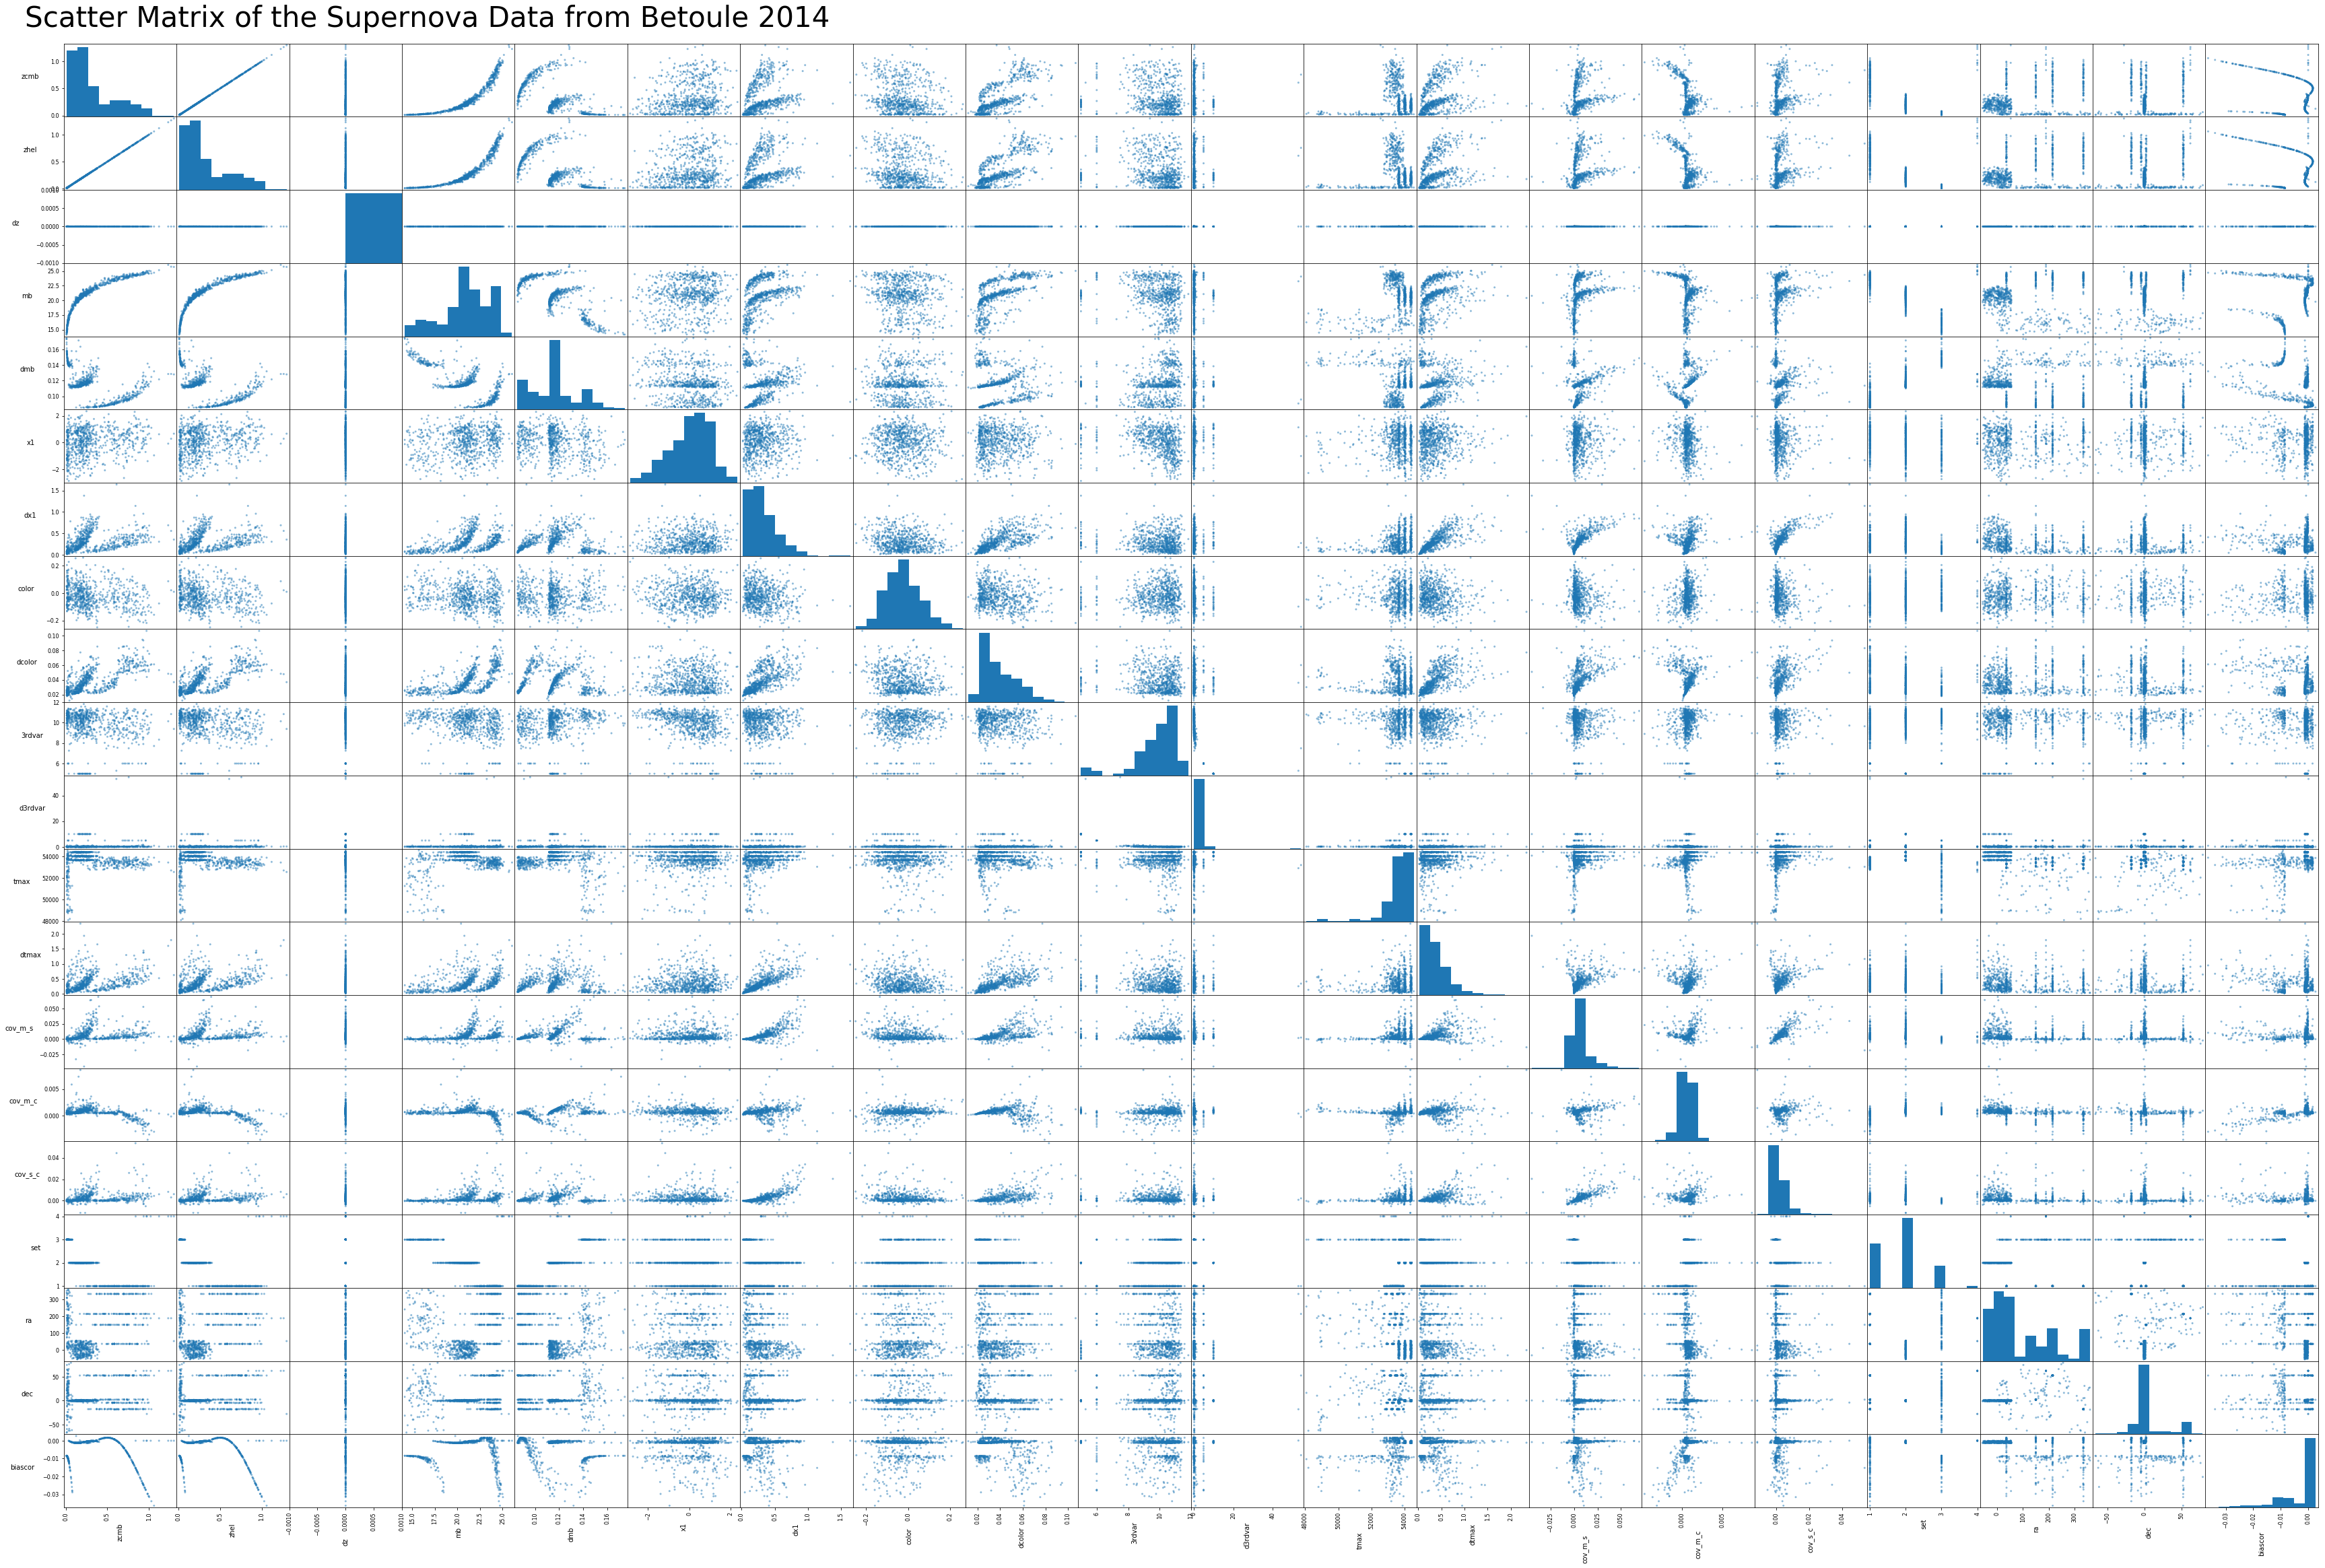

In [68]:
axes = pd.plotting.scatter_matrix(jla, figsize=(60,40));

# this block is to fix the labels on these plots to make them actually legible
n = len(jla.columns)-1
for x in range(n):
  for y in range(n):
    ax=axes[x, y]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.labelpad = 30
plt.suptitle('Scatter Matrix of the Supernova Data from Betoule 2014', x = 0.25, y=0.90, fontsize="42");
#   x: 0.01, 0.1 0.2 < x < 0.3, 0.4, 0.5
#   y= too high: 0.98

**Note to the grader: opening this notebook in Google Colab allows for an increased, legible size of this plot. However, nbviewer.jupyter.org does not properly size this figure.**

*Due to the size of the above figure neccesary for legibility, the caption was placed here instead.*

Figure 1: The scatter matrix of various supernovae measurements described in Betoule 2014. Of interest here are **zCMB** and **MB**, redshift of the supernovae adjusted to the value as measured in the Cosmic Microwave Background frame, and B-band peak magnitude, respectively.

In [0]:
# plt.plot?

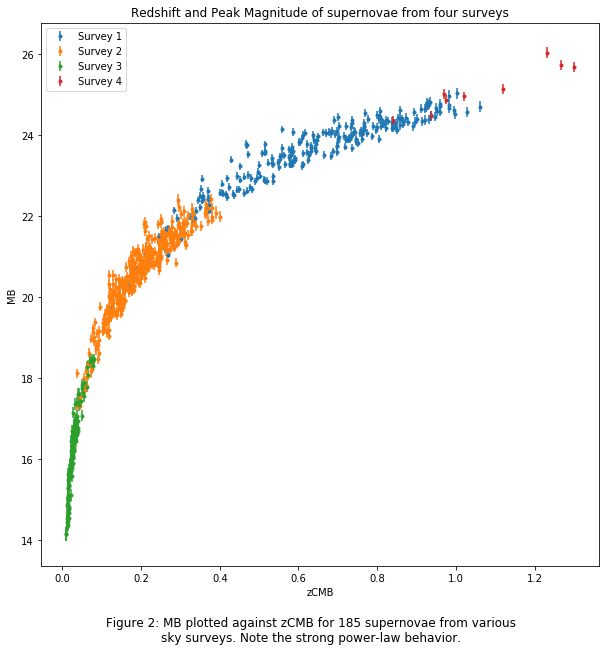

In [74]:
plt.figure(figsize=(10,10))
for i in range(1,5):
  plt.errorbar(jla.zcmb[jla.set == i], jla.mb[jla.set == i], 
               yerr=jla.dmb[jla.set == i], fmt='.', label = 'Survey '+str(i));
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.title("Redshift and Peak Magnitude of supernovae from four surveys")
plt.legend()
txt='Figure 2: MB plotted against zCMB for 185 supernovae from various\n\
sky surveys. Note the strong power-law behavior.'
plt.figtext(0.5, 0.02, txt, ha='center', fontsize = 12);

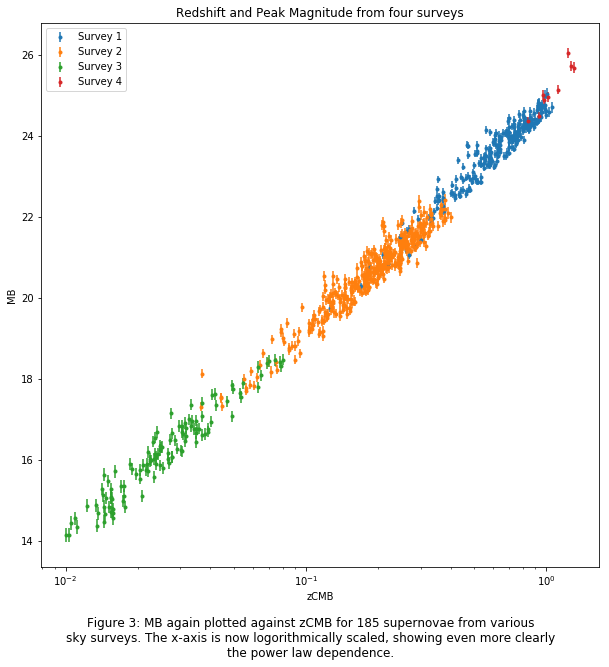

In [77]:
plt.figure(figsize=(10,10))
for i in range(1,5):
  plt.errorbar(jla.zcmb[jla.set == i], jla.mb[jla.set == i], 
               yerr=jla.dmb[jla.set == i], fmt='.', label = 'Survey '+str(i));
plt.xscale("log")
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.title("Redshift and Peak Magnitude from four surveys")
plt.legend();
txt='Figure 3: MB again plotted against zCMB for 185 supernovae from various\n\
sky surveys. The x-axis is now logorithmically scaled, showing even more clearly\n\
the power law dependence.'
plt.figtext(0.5, 0, txt, ha='center', fontsize = 12);

In [0]:
def logline(x,a,b):
  """
  parameters:
    a->slope
    b->yintercept
    x is an array of values
    returns a list of y values
  """
  return a * np.log10(x) + b

In [0]:
zopt, zcov = sp.optimize.curve_fit(logline, jla.zcmb, jla.mb, p0=[6,14])

In [25]:
# print(zopt) #hide
# print(zcov) #hide
print(f'slope = {zopt[0]:0.3f} ± {(zcov[0][0]**0.5):0.3f}')
print(f'intercept = {zopt[1]:0.3f} ± {(zcov[1][1]**0.5):0.3f}')
print(f'parameter covariance = {zcov[0][1]:0.5f}')

slope = 5.372 ± 0.022
intercept = 24.656 ± 0.019
parameter covariance = 0.00035


In [0]:
sortz = np.argsort(jla.zcmb)

In [0]:
# plt.plot(jla.zcmb, logline(jla.zcmb, zopt[0], zopt[1]), "-")
# plt.xscale('log')

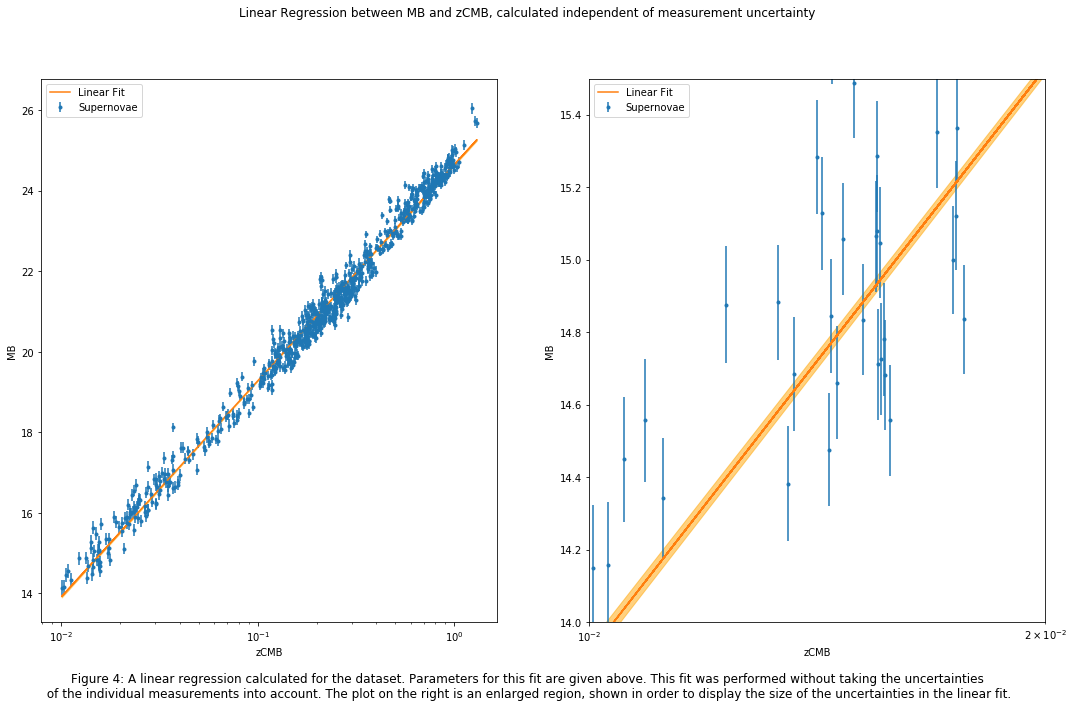

In [82]:
plt.figure(figsize=(18,10))
plt.suptitle('Linear Regression between MB and zCMB, calculated independent of measurement uncertainty')
plt.subplot(121)
plt.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".", label='Supernovae')
plt.plot(jla.zcmb, logline(jla.zcmb, zopt[0], zopt[1]), "-", label='Linear Fit')
plt.fill_between(jla.zcmb[sortz],
                 logline(jla.zcmb[sortz], zopt[0] + zcov[0][0]**0.5, zopt[1] + zcov[1][1]**0.5),
                 logline(jla.zcmb[sortz], zopt[0] - zcov[0][0]**0.5, zopt[1] - zcov[1][1]**0.5),
                 color='orange', alpha=0.5)
plt.xscale('log')
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.legend()
# plt.title("calculation without error barsssssssss");
# plt.show()

plt.subplot(122)
plt.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".", label='Supernovae')
plt.plot(jla.zcmb, logline(jla.zcmb, zopt[0], zopt[1]), "-", label='Linear Fit')
plt.fill_between(jla.zcmb[sortz],
                 logline(jla.zcmb[sortz], zopt[0] + zcov[0][0]**0.5, zopt[1] + zcov[1][1]**0.5),
                 logline(jla.zcmb[sortz], zopt[0] - zcov[0][0]**0.5, zopt[1] - zcov[1][1]**0.5),
                 color='orange', alpha=0.5)
plt.xscale('log')
# plt.title("calculation without error barsssssssss");
plt.ylim((14,15.5))
plt.xlim((.01,.02))
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.legend()
txt='Figure 4: A linear regression calculated for the dataset. Parameters for\
 this fit are given above. This fit was performed without taking the uncertainties\n\
 of the individual measurements into account. The plot on the right is an enlarged\
 region, shown in order to display the size of the uncertainties in the linear fit.'
plt.figtext(0.5, 0.02, txt, ha='center', fontsize = 12);
plt.show()


In [0]:
zeopt, zecov = sp.optimize.curve_fit(logline, jla.zcmb, jla.mb, p0=[6,14], sigma = jla.dmb)

In [30]:
# zeopt
# zecov
print('  When the unceratinties in peak magnitude are included in the regression,\n\
the fit parameters are:') #TODO
print(f'slope = {zeopt[0]:0.3f} ± {(zecov[0][0]**0.5):0.3f}')
print(f'intercept = {zeopt[1]:0.3f} ± {(zecov[1][1]**0.5):0.3f}')
print(f'parameter covariance = {zecov[0][1]:0.5f}')

print('\n  Fitting the same data without acknowledging the uncertainties in\n\
peak magnitude gives:')
print(f'slope = {zopt[0]:0.3f} ± {(zcov[0][0]**0.5):0.3f}')
print(f'intercept = {zopt[1]:0.3f} ± {(zcov[1][1]**0.5):0.3f}')
print(f'parameter covariance = {zcov[0][1]:0.5f}')

  When the unceratinties in peak magnitude are included in the regression,
the fit parameters are:
slope = 5.426 ± 0.025
intercept = 24.696 ± 0.018
parameter covariance = 0.00036

  Fitting the same data without acknowledging the uncertainties in
peak magnitude gives:
slope = 5.372 ± 0.022
intercept = 24.656 ± 0.019
parameter covariance = 0.00035


To analyze the agreement of these results, I will use a two-sample *z*-test. Setting an $\alpha=2$ confidence threshold (i.e. $p < 0.05$), the two results are not in agreement with each other if

$$\begin{align}
z & \geq\alpha
\\
\frac{| m_1-m_2 |}{\sqrt{\sigma_{m1}^2+\sigma_{m2}^2}} & \geq 2
\end{align}$$

In [31]:
# print(zeopt[0]-zecov[0][0],zeopt[0]+zecov[0][0])
# print(zopt[0]-zcov[0][0],zopt[0]+zcov[0][0])
print('The slopes found by the two models are in agreement if', end=' ')
print(f'{np.abs(zopt[0]-zeopt[0])/((zcov[0][0]+zecov[0][0])**0.5):0.3f} ≤ 2, and\n\
the y-intercepts found by the two models are in agreement if', end=' ')
print(f'{np.abs(zopt[1]-zeopt[1])/((zcov[1][1]+zecov[1][1])**0.5):0.3f} ≤ 2.')

The slopes found by the two models are in agreement if 1.627 ≤ 2, and
the y-intercepts found by the two models are in agreement if 1.519 ≤ 2.


So by this two-sample *z*-test, there is no evidence that the two models give statistically different linear regressions.

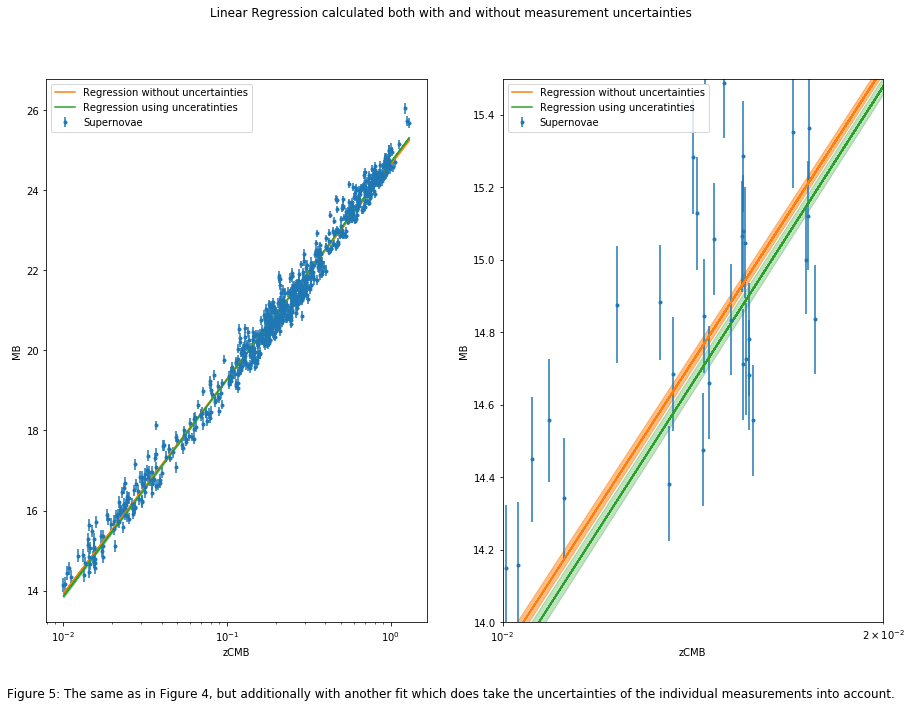

In [83]:
plt.figure(figsize=(15,10))
plt.suptitle('Linear Regression calculated both with and without measurement uncertainties')
plt.subplot(121)
plt.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".", label='Supernovae')
##
plt.plot(jla.zcmb, logline(jla.zcmb, zopt[0], zopt[1]), "-", c = 'C1', label = 'Regression without uncertainties')
plt.fill_between(jla.zcmb[sortz],
                 logline(jla.zcmb[sortz], zopt[0] + zcov[0][0]**0.5, zopt[1] + zcov[1][1]**0.5),
                 logline(jla.zcmb[sortz], zopt[0] - zcov[0][0]**0.5, zopt[1] - zcov[1][1]**0.5),
                 color = 'C1',alpha=0.5)
##
plt.plot(jla.zcmb, logline(jla.zcmb, zeopt[0], zeopt[1]), "-", c = 'C2', label = 'Regression using unceratinties')
plt.fill_between(jla.zcmb[sortz],
                 logline(jla.zcmb[sortz], zeopt[0] + zecov[0][0]**0.5, zeopt[1] + zecov[1][1]**0.5),
                 logline(jla.zcmb[sortz], zeopt[0] - zecov[0][0]**0.5, zeopt[1] - zecov[1][1]**0.5),
                 color = 'C2',alpha=0.5)
##
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.xscale('log')
# plt.title("calculation with and without error barsssssssss");
plt.legend()
##########

plt.subplot(122)
plt.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".", label='Supernovae')
##
plt.plot(jla.zcmb, logline(jla.zcmb, zopt[0], zopt[1]), "-", c = 'C1', label = 'Regression without uncertainties')
plt.fill_between(jla.zcmb[sortz],
                 logline(jla.zcmb[sortz], zopt[0] + zcov[0][0]**0.5, zopt[1] + zcov[1][1]**0.5),
                 logline(jla.zcmb[sortz], zopt[0] - zcov[0][0]**0.5, zopt[1] - zcov[1][1]**0.5),
                 color = 'C1', alpha=0.5)
##
plt.plot(jla.zcmb, logline(jla.zcmb, zeopt[0], zeopt[1]), "-", c = 'C2', label = 'Regression using unceratinties')
plt.fill_between(jla.zcmb[sortz],
                 logline(jla.zcmb[sortz], zeopt[0] + zecov[0][0]**0.5, zeopt[1] + zecov[1][1]**0.5),
                 logline(jla.zcmb[sortz], zeopt[0] - zecov[0][0]**0.5, zeopt[1] - zecov[1][1]**0.5),
                 color = 'C2', alpha=0.3)
##
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.xscale('log')
# plt.title("calculation with and without error barsssssssss");
plt.legend()
plt.ylim((14,15.5))
plt.xlim((.01,.02));
txt='Figure 5: The same as in Figure 4, but additionally with another fit which\
 does take the uncertainties of the individual measurements into account.'
plt.figtext(0.5, 0.02, txt, ha='center', fontsize = 12);

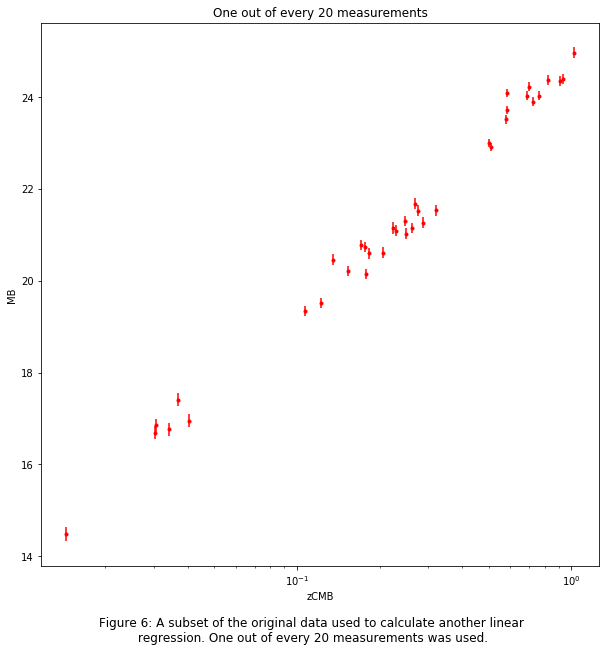

In [84]:
slicedx = jla.zcmb[0::20]
slicedy = jla.mb[0::20]
slicede = jla.dmb[0::20]

plt.figure(figsize=(10,10))
plt.title('One out of every 20 measurements')
plt.errorbar(slicedx, slicedy, yerr=slicede, fmt='r.')
plt.xscale('log')
plt.xlabel("zCMB")
plt.ylabel("MB");
txt='Figure 6: A subset of the original data used to calculate another linear\n\
 regression. One out of every 20 measurements was used.'
plt.figtext(0.5, 0.02, txt, ha='center', fontsize = 12);

In [34]:
poptS, pcovS = sp.optimize.curve_fit(logline, slicedx, slicedy)

print('The regression coefficients for the model made based on one in every \n\
20 points are:')
print(f'slope = {poptS[0]:0.3f} ± {(pcovS[0][0]**0.5):0.3f}')
print(f'intercept = {poptS[1]:0.3f} ± {(pcovS[1][1]**0.5):0.3f}')
print(f'parameter covariance = {pcovS[0][1]:0.5f}')

The regression coefficients for the model made based on one in every 
20 points are:
slope = 5.421 ± 0.100
intercept = 24.678 ± 0.080
parameter covariance = 0.00640


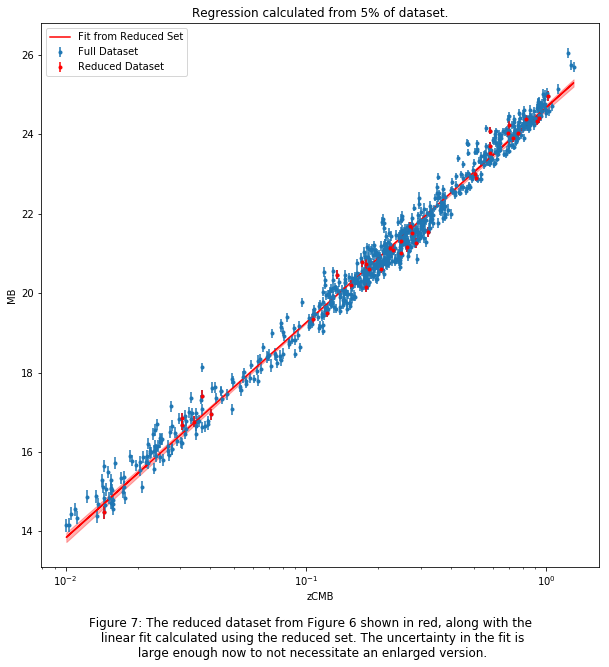

In [90]:
plt.figure(figsize=(10,10))
plt.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".", label = 'Full Dataset')
plt.errorbar(slicedx, slicedy, yerr = slicede, fmt="r.", label = 'Reduced Dataset')
##
plt.plot(jla.zcmb, logline(jla.zcmb, poptS[0], poptS[1]), "r", label = 'Fit from Reduced Set')
#yeah that should be a jla.zcmb in the line above: it lets the plot extend to 
#the edges of the data. the parameters are still from the reduced set.
plt.fill_between(jla.zcmb[sortz],
                 logline(jla.zcmb[sortz], poptS[0] + pcovS[0][0]**0.5, poptS[1] + pcovS[1][1]**0.5),
                 logline(jla.zcmb[sortz], poptS[0] - pcovS[0][0]**0.5, poptS[1] - pcovS[1][1]**0.5),
                 color='r',alpha=0.3)
##
plt.xscale('log')
plt.title("Regression calculated from 5% of dataset.");
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.legend();
# plt.ylim(14,15.5)
# plt.xlim(0.01,0.02)
txt='Figure 7: The reduced dataset from Figure 6 shown in red, along with the\n\
 linear fit calculated using the reduced set. The uncertainty in the fit is\n\
 large enough now to not necessitate an enlarged version.'
plt.figtext(0.5, 0.0, txt, ha='center', fontsize = 12);

In [36]:
# old version of this statement
# print('comparing the reduced sample\'s regression to the errorbarless regression\
#  the models are in agreement')

# print('if', np.abs(zopt[0]-poptS[0]), '≤', 3*(zcov[0][0]+pcovS[0][0])**0.5, 
#       '... (this is the one for slopes)')
# print('if', np.abs(zopt[1]-poptS[1]), '≤', 3*(zcov[1][1]+pcovS[1][1])**0.5, 
#       '... (this is the one for slopes)')

# print('\n~~\n')

# print('comparing the reduced sample\'s regression to the errorbarful regression\
#  the models are in agreement')

# print('if', np.abs(zeopt[0]-poptS[0]), '≤', 3*(zecov[0][0]+pcovS[0][0])**0.5, 
#       '... (this is the one for slopes)')
# print('if', np.abs(zeopt[1]-poptS[1]), '≤', 3*(zecov[1][1]+pcovS[1][1])**0.5, 
#       '... (this is the one for slopes)')

#####
# neater version
print('First, comparing the smaller-sample-regression to the regression that did\n\
not take into account the uncertainty in the measurements:')
print('The slopes found by the two models are in agreement if', end=' ')
print(f'{np.abs(zopt[0]-poptS[0])/((zcov[0][0]+pcovS[0][0])**0.5):0.3f} ≤ 2, and\n\
the y-intercepts found by the two models are in agreement if', end=' ')
print(f'{np.abs(zopt[1]-poptS[1])/((zcov[1][1]+pcovS[1][1])**0.5):0.3f} ≤ 2.')


print('\nAnd now comparint the smaller-sample-regression to the one that DID\n\
take measurement uncertainties into account:')
print('The slopes found by the two models are in agreement if', end=' ')
print(f'{np.abs(zeopt[0]-poptS[0])/((zecov[0][0]+pcovS[0][0])**0.5):0.3f} ≤ 2, and\n\
the y-intercepts found by the two models are in agreement if', end=' ')
print(f'{np.abs(zeopt[1]-poptS[1])/((zecov[1][1]+pcovS[1][1])**0.5):0.3f} ≤ 2.')

First, comparing the smaller-sample-regression to the regression that did
not take into account the uncertainty in the measurements:
The slopes found by the two models are in agreement if 0.478 ≤ 2, and
the y-intercepts found by the two models are in agreement if 0.266 ≤ 2.

And now comparint the smaller-sample-regression to the one that DID
take measurement uncertainties into account:
The slopes found by the two models are in agreement if 0.048 ≤ 2, and
the y-intercepts found by the two models are in agreement if 0.221 ≤ 2.


These tests gave even smaller z-scores. However, the regression that used $1/20^\text{th}$ the number of datapoints had accordingly larger unceratinties in the parameters, thus leading to a lower z-score.

In [0]:
# def logline(x,a,b):
#   """
#   parameters:
#     a->slope
#     b->yintercept
#     x is an array of values
#     returns a list of y values
#   """
#   return a * np.log10(x) + b

def logquad(x, a, b, c):
  """
  quadratic curve of the form:
    y = a log10(x)^2 + b log10(x) + c
  """
  return a * np.log10(x)**2 + b * np.log10(x) + c

In [38]:
# zopt, zcov = sp.optimize.curve_fit(logline, jla.zcmb, jla.mb, p0=[6,14])
qeopt, qecov = sp.optimize.curve_fit(logquad, jla.zcmb, jla.mb, p0=[2,2,2], sigma=jla.dmb)
# print(qeopt, '\n\n', qecov)

print('The regression coefficients for the quadratic fit are:')
print(f'quadratic coefficient = \t{qeopt[0]:0.3f} ± {(qecov[0][0]**0.5):0.3f}')
print(f'linear coefficient = \t\t{qeopt[1]:0.3f} ± {(qecov[1][1]**0.5):0.3f}')
print(f'intercept = \t\t\t{qeopt[2]:0.3f} ± {(qecov[2][2]**0.5):0.3f}')
print(f'quadratic-linear covariance = \t{qecov[0][1]:0.4f}')
print(f'quadratic-intercept covariance= {qecov[0][2]:0.5f}')
print(f'linear-intercept covariance = \t{qecov[1][2]:0.4f}')

The regression coefficients for the quadratic fit are:
quadratic coefficient = 	0.348 ± 0.042
linear coefficient = 		5.985 ± 0.071
intercept = 			24.839 ± 0.024
quadratic-linear covariance = 	0.0028
quadratic-intercept covariance= 0.00071
linear-intercept covariance = 	0.0015


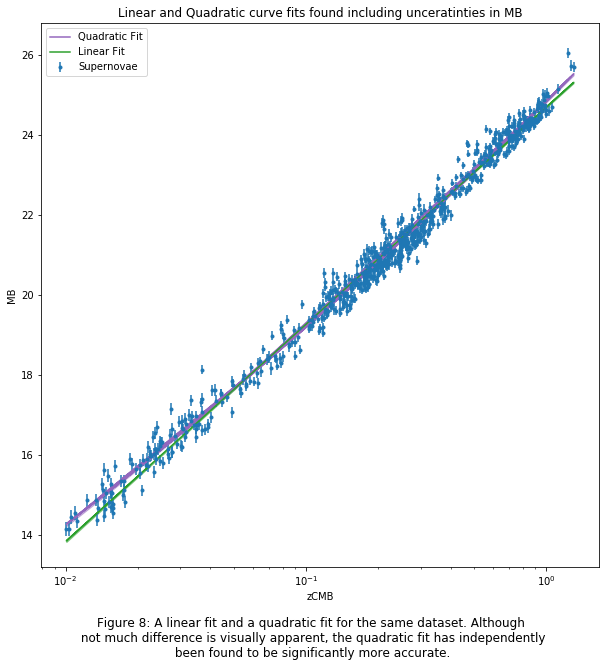

In [89]:
plt.figure(figsize=(10,10))
# plt.subplot(121)
plt.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".", label = 'Supernovae')
##
plt.plot(jla.zcmb, logquad(jla.zcmb, qeopt[0], qeopt[1], qeopt[2]), "-", c='C4', label = 'Quadratic Fit')
plt.fill_between(jla.zcmb[sortz],
                 logquad(jla.zcmb[sortz], qeopt[0] + qecov[0][0]**0.5, qeopt[1] + qecov[1][1]**0.5, qeopt[2] + qecov[2][2]**0.5),
                 logquad(jla.zcmb[sortz], qeopt[0] - qecov[0][0]**0.5, qeopt[1] - qecov[1][1]**0.5, qeopt[2] - qecov[2][2]**0.5),
                 color='C4',alpha=0.5)
##
plt.plot(jla.zcmb, logline(jla.zcmb, zeopt[0], zeopt[1]), "-", c='C2', label = 'Linear Fit')
plt.fill_between(jla.zcmb[sortz],
                 logline(jla.zcmb[sortz], zeopt[0] + zecov[0][0]**0.5, zeopt[1] + zecov[1][1]**0.5),
                 logline(jla.zcmb[sortz], zeopt[0] - zecov[0][0]**0.5, zeopt[1] - zecov[1][1]**0.5),
                 color='C2',alpha=0.5)
##
plt.xscale('log')
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.legend()
plt.title("Linear and Quadratic curve fits found including unceratinties in MB");
txt='Figure 8: A linear fit and a quadratic fit for the same dataset. Although\n\
 not much difference is visually apparent, the quadratic fit has independently\n\
 been found to be significantly more accurate.'
plt.figtext(0.5, 0.0, txt, ha='center', fontsize = 12);

# Sklearn

In [40]:
regr = skl.linear_model.LinearRegression()
regr.fit(np.atleast_2d(np.log10(jla.zcmb)).T, jla.mb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

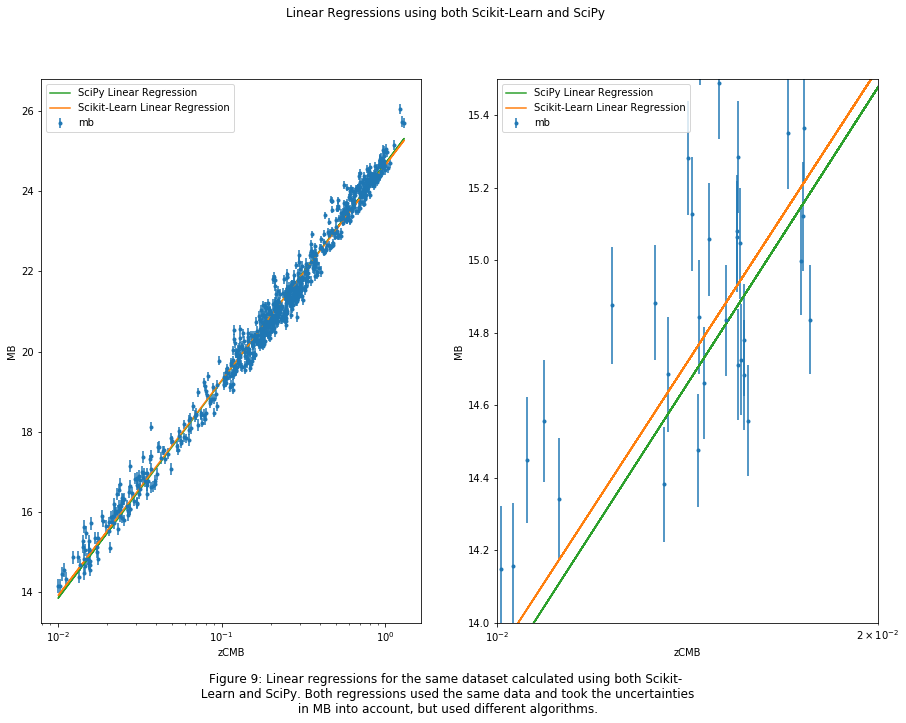

In [92]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
##
plt.plot(jla.zcmb, logline(jla.zcmb, zeopt[0], zeopt[1]), "-", c='C2', 
         label = 'SciPy Linear Regression')
# plt.fill_between(jla.zcmb[sortz],
#                  logline(jla.zcmb[sortz], zeopt[0] + zecov[0][0]**0.5, zeopt[1] + zecov[1][1]**0.5),
#                  logline(jla.zcmb[sortz], zeopt[0] - zecov[0][0]**0.5, zeopt[1] - zecov[1][1]**0.5),
#                  color='C2',alpha=0.5)
##
plt.plot(jla.zcmb, regr.predict(np.atleast_2d(np.log10(jla.zcmb)).T), '-', 
         label="Scikit-Learn Linear Regression")
##
plt.xscale('log')
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.legend()

####

plt.subplot(122)
plt.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
##
plt.plot(jla.zcmb, logline(jla.zcmb, zeopt[0], zeopt[1]), "-", c='C2', 
         label = 'SciPy Linear Regression')
# plt.fill_between(jla.zcmb[sortz],
#                  logline(jla.zcmb[sortz], zeopt[0] + zecov[0][0]**0.5, zeopt[1] + zecov[1][1]**0.5),
#                  logline(jla.zcmb[sortz], zeopt[0] - zecov[0][0]**0.5, zeopt[1] - zecov[1][1]**0.5),
#                  color='C2',alpha=0.5)
##
plt.plot(jla.zcmb, regr.predict(np.atleast_2d(np.log10(jla.zcmb)).T), '-', 
         label="Scikit-Learn Linear Regression")
##
plt.xlim(0.01,0.02)
plt.ylim(14,15.5)
plt.xscale('log')
plt.xlabel("zCMB")
plt.ylabel("MB")
plt.legend()
plt.suptitle("Linear Regressions using both Scikit-Learn and SciPy");
txt='Figure 9: Linear regressions for the same dataset calculated using both Scikit-\n\
 Learn and SciPy. Both regressions used the same data and took the uncertainties\n\
 in MB into account, but used different algorithms.'
plt.figtext(0.5, 0.0, txt, ha='center', fontsize = 12);

## Cross Validation

In [0]:
# now using sklearn to split up the data into a training and testing thing
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(np.log10(jla.zcmb), jla.mb, test_size = 0.25, train_size = 0.75, random_state = 8752)

In [0]:
regr1 = skl.linear_model.LinearRegression()

In [0]:
regr1.fit(np.atleast_2d(X_train).T, y_train);

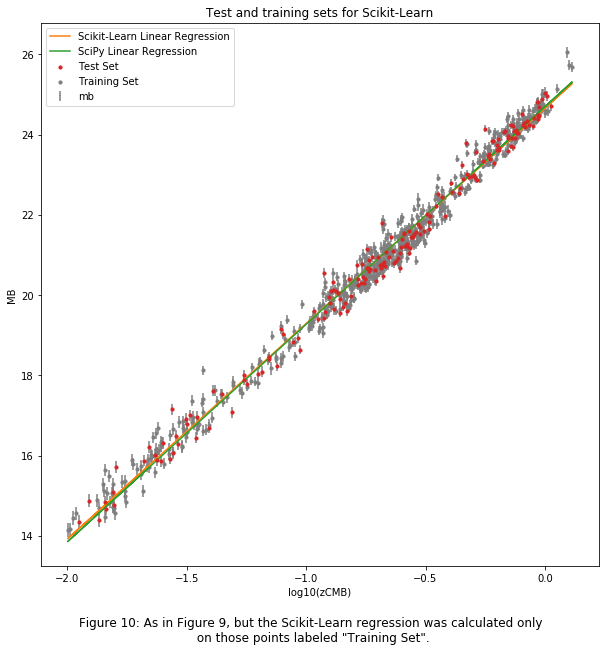

In [93]:
plt.figure(figsize = (10,10))



plt.scatter(X_test, y_test, s = 10, color = 'C3', label = 'Test Set',zorder=3)
plt.scatter(X_train, y_train, s = 10, color = 'C7', label = 'Training Set',zorder=2)

plt.plot(np.log10(jla.zcmb), regr1.predict(np.atleast_2d(np.log10(jla.zcmb)).T), 
         '-', c='C1', label="Scikit-Learn Linear Regression")

plt.plot(np.log10(jla.zcmb), logline(jla.zcmb, zeopt[0], zeopt[1]), "-", c='C2',
         label = 'SciPy Linear Regression')

plt.errorbar(np.log10(jla.zcmb), jla.mb, yerr = jla.dmb, c='C7', fmt=",", zorder=1)
plt.legend();
plt.xlabel("log10(zCMB)")
plt.ylabel("MB");
plt.title("Test and training sets for Scikit-Learn");
txt='Figure 10: As in Figure 9, but the Scikit-Learn regression was calculated only\n\
 on those points labeled "Training Set".'
plt.figtext(0.5, 0.02, txt, ha='center', fontsize = 12);

In [46]:
print("Score for the training set: ", np.round(regr1.score(np.atleast_2d(X_train).T, y_train), 4))

Score for the training set:  0.9873


In [47]:
print("Score for the test set: ", np.round(regr1.score(np.atleast_2d(X_test).T, y_test), 4))

Score for the test set:  0.9881


<span style="color:red">**Good Job!**</span>

# Analysis
The score ($R^2$) for the test set is slightly higher than that for the training set. If the score for the training set was appreciably higher than that of the test set, the model would likely be 'overfit' to the training set — i.e. the fit would be a statement simply about the sample and not a general relationship, and would be of little use outside of the training set. Both scores are close to 1 which is ideal, meaning the linear fit is very successful for this relationship. The fact that the test set actually has a *higher* score than the training set is likely due to the random selection of points for the test set happened to be slightly less variable from the found linear relationship.

